In [2]:
#importing important modules
import numpy as np 
import pandas as pd  
import matplotlib.pyplot as plt  
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import neighbors


In [3]:
#loading data
#reading data, coverting all '?' to Nan 
hepData =pd.read_csv('hepatitis.csv', sep=',',na_values=['nan','?'])
hepData.head(5)

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,2,1,2,2,2,2,1,2,2,2,2,2,1.0,85,18,4.0,61,1,2
1,50,1,1,2,1,2,2,1,2,2,2,2,2,0.9,135,42,3.5,61,1,2
2,78,1,2,2,1,2,2,2,2,2,2,2,2,0.7,96,32,4.0,61,1,2
3,34,1,2,2,2,2,2,2,2,2,2,2,2,1.0,105,200,4.0,61,1,2
4,34,1,2,2,2,2,2,2,2,2,2,2,2,0.9,95,28,4.0,75,1,2


In [4]:
#Encode the categorical data
for col in hepData.columns[1:13]:
    hepData[col] = hepData[col].map({1:0, 2: 1})
hepData['class'] =hepData['class'].map({1:0, 2: 1})
hepData['histology'] =hepData['histology'].map({1:0, 2: 1})
hepData.head()
hepData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
age               142 non-null int64
sex               142 non-null int64
steroid           142 non-null int64
antivirals        142 non-null int64
fatigue           142 non-null int64
malaise           142 non-null int64
anorexia          142 non-null int64
liver_big         142 non-null int64
liver_firm        142 non-null int64
spleen_palable    142 non-null int64
spiders           142 non-null int64
ascites           142 non-null int64
varices           142 non-null int64
bilirubin         142 non-null float64
alk_phosphate     142 non-null int64
sgot              142 non-null int64
albumin           142 non-null float64
protime           142 non-null int64
histology         142 non-null int64
class             142 non-null int64
dtypes: float64(2), int64(18)
memory usage: 22.3 KB


In [5]:
hepData.head()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
0,30,1,0,1,1,1,1,0,1,1,1,1,1,1.0,85,18,4.0,61,0,1
1,50,0,0,1,0,1,1,0,1,1,1,1,1,0.9,135,42,3.5,61,0,1
2,78,0,1,1,0,1,1,1,1,1,1,1,1,0.7,96,32,4.0,61,0,1
3,34,0,1,1,1,1,1,1,1,1,1,1,1,1.0,105,200,4.0,61,0,1
4,34,0,1,1,1,1,1,1,1,1,1,1,1,0.9,95,28,4.0,75,0,1


<Figure size 432x288 with 0 Axes>

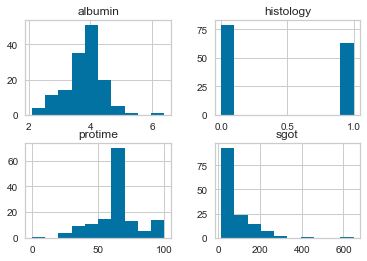

<Figure size 432x288 with 0 Axes>

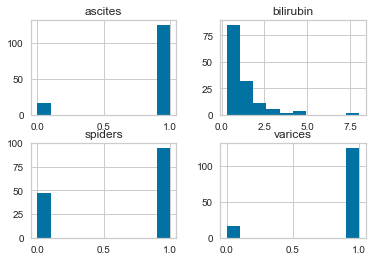

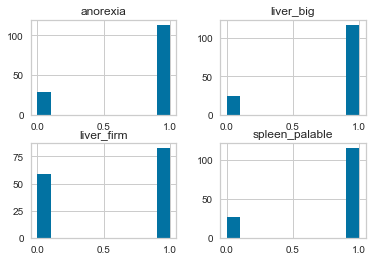

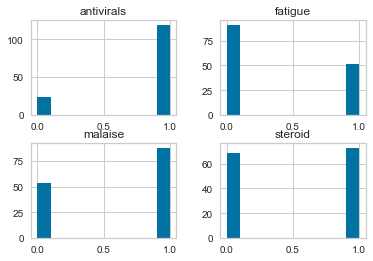

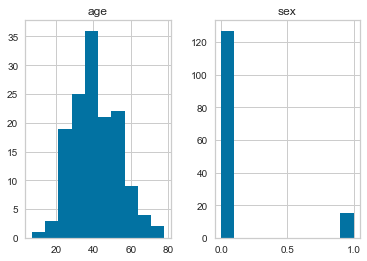

In [6]:

from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(4,4)
# large subplot

hepData.iloc[:,15:19].hist()
plt.show()

from matplotlib.pyplot import figure
import matplotlib.gridspec as gridspec
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(4,4)
# large subplot

hepData.iloc[:,10:14].hist()
plt.show()

hepData.iloc[:,6:10].hist()
plt.show()
hepData.iloc[:,2:6].hist()
plt.show()
hepData.iloc[:,0:2].hist()
plt.show()


<Figure size 432x288 with 0 Axes>

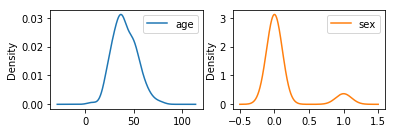

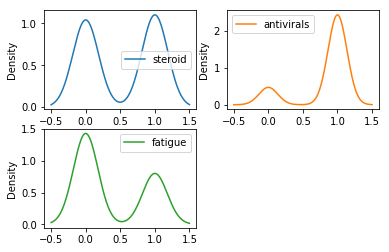

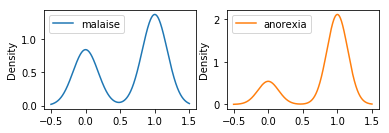

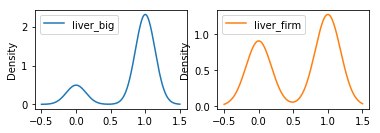

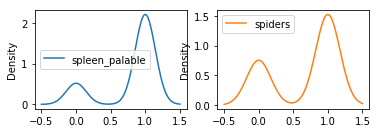

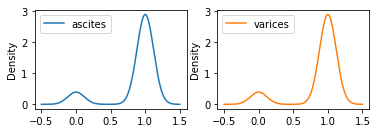

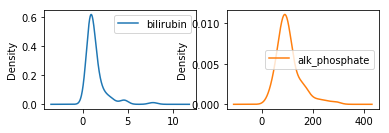

In [43]:
# plt.figure(figsize = (10,10))
import matplotlib.gridspec as gridspec
# Plot figure with subplots of different sizes
fig = plt.figure(1)
# set up subplot grid
gridspec.GridSpec(4,4)
hepData.iloc[:,0:2].plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()
hepData.iloc[:,2:5].plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()
hepData.iloc[:,5:7].plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()
hepData.iloc[:,7:9].plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()
hepData.iloc[:,9:11].plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()
hepData.iloc[:,11:13].plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()
hepData.iloc[:,13:15].plot(kind='density', subplots=True, layout=(2,2), sharex=False)
plt.show()


In [7]:
#checking for null values
hepData.info()
# fill missing values with mean column values
hepData.fillna(hepData.mean(), inplace=True)
# count the number of NaN values in each column
print(hepData.isnull().sum())
hepData.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 20 columns):
age               142 non-null int64
sex               142 non-null int64
steroid           142 non-null int64
antivirals        142 non-null int64
fatigue           142 non-null int64
malaise           142 non-null int64
anorexia          142 non-null int64
liver_big         142 non-null int64
liver_firm        142 non-null int64
spleen_palable    142 non-null int64
spiders           142 non-null int64
ascites           142 non-null int64
varices           142 non-null int64
bilirubin         142 non-null float64
alk_phosphate     142 non-null int64
sgot              142 non-null int64
albumin           142 non-null float64
protime           142 non-null int64
histology         142 non-null int64
class             142 non-null int64
dtypes: float64(2), int64(18)
memory usage: 22.3 KB
age               0
sex               0
steroid           0
antivirals        0
fatigue           0

(142, 20)

In [8]:
#statistical summary of data
hepData.describe()

,age,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,40.816901,0.105634,0.514085,0.838028,0.359155,0.619718,0.795775,0.823944,0.584507,0.809859,0.669014,0.880282,0.880282,1.382958,105.647887,83.507042,3.830493,61.704225,0.443662,0.816901
std,12.189182,0.308456,0.501571,0.369729,0.481451,0.487174,0.404561,0.382216,0.494551,0.393801,0.472234,0.325781,0.325781,1.166526,47.375099,82.417700,0.618103,17.696732,0.498575,0.388116
min,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.300000,26.000000,14.000000,2.100000,0.000000,0.000000,0.000000
25%,32.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.700000,78.500000,32.250000,3.500000,56.250000,0.000000,1.000000
50%,39.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,100.000000,58.000000,3.900000,61.000000,0.000000,1.000000
75%,50.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.480000,119.750000,99.500000,4.200000,66.000000,1.000000,1.000000
max,78.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,295.000000,648.000000,6.400000,100.000000,1.000000,1.000000


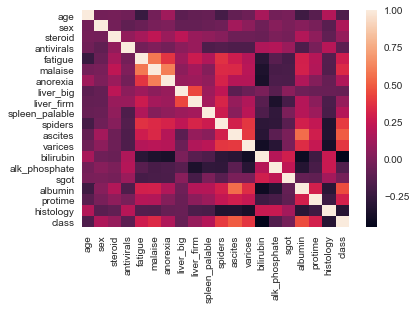

In [9]:
#correlation in data
corr = hepData.corr()
import seaborn as sns
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [10]:
#dividing the data into attributes and labels
X = hepData.drop('class', axis=1) 
y = hepData['class']  


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


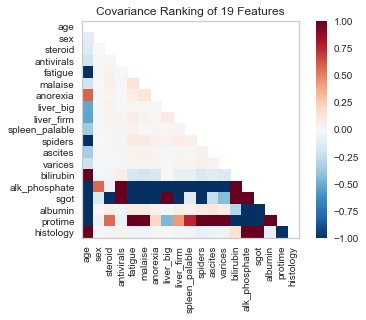

In [11]:
from yellowbrick.features import Rank2D
features = ['age','sex','steroid','antivirals','fatigue','malaise','anorexia','liver_big','liver_firm','spleen_palable','spiders',
            'ascites','varices','bilirubin','alk_phosphate','sgot','albumin','protime','histology']
# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=features, algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data


In [12]:
# Standardizing the features
#from sklearn.preprocessing import StandardScaler
#X = StandardScaler().fit_transform(X)

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


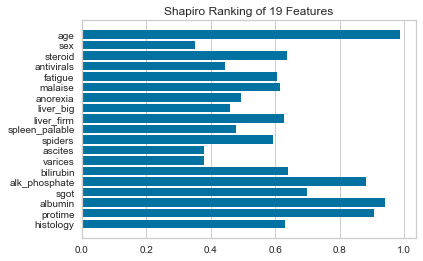

In [13]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=features, algorithm='shapiro')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\yellowbrick\features\rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


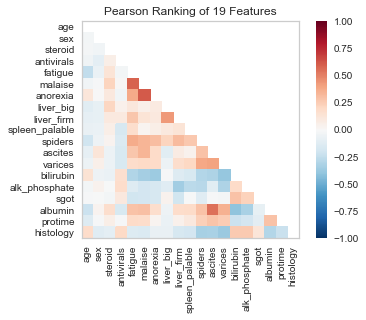

In [14]:
# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(features=features, algorithm='pearson')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

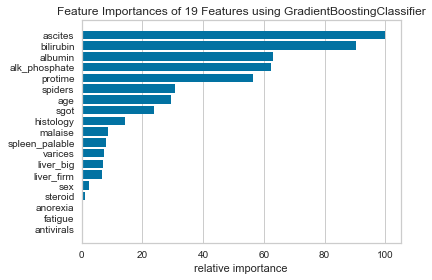

In [15]:
#Finding Important features from the dataset
import matplotlib.pyplot as plt

from sklearn.ensemble import GradientBoostingClassifier

from yellowbrick.features.importances import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()
# The above figure shows the features ranked according to the explained variance each feature contributes to the model. 
# In this case the features are plotted against their relative importance, 
# that is the percent importance of the most important feature. 

In [17]:
#perfomring PCA
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
pca = PCA(n_components =2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
finalDf = pd.concat([principalDf, hepData[['class']]], axis = 1)

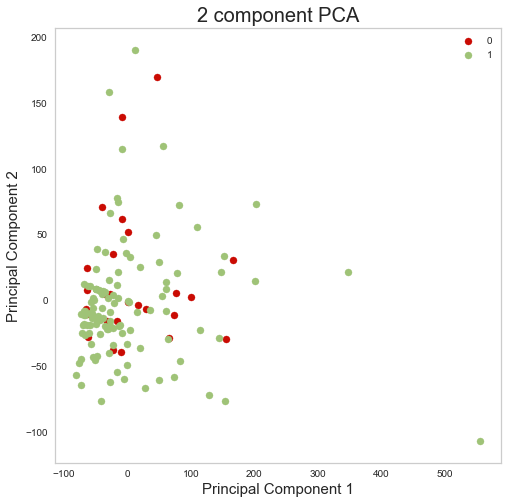

In [18]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0, 1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['class'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

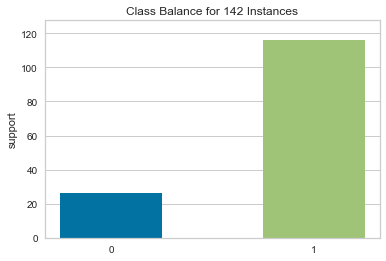

In [19]:
#finding class balance
from yellowbrick.target import ClassBalance

visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(y)
visualizer.poof()
# The resulting figure allows us to diagnose the severity of the balance issue.


length of oversampled data is  184
Number of hepatitis POS rows in oversampled data 0
No.of hepatitis HEG  92
Proportion of Hepatitis patients in oversampled data is  0.0
Proportion of non-Hepatitis patients in oversampled data is  0.5


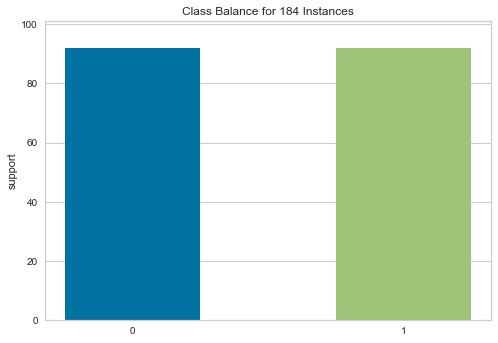

In [10]:
# Lets Use SMOTE for Sampling
# As I mentioned it is also a type of oversampling but in this the data is not replicated but they are created 
#lets start with importing libraries
from imblearn.over_sampling import SMOTE
data = hepData
os = SMOTE(random_state=0) #   We are using SMOTE as the function for oversampling
# now we can devided our data into training and test data
# Call our method data prepration on our dataset
from sklearn.model_selection import train_test_split  
#dividing the data into attributes and labels
OS_X = hepData.drop('class', axis=1) 
OS_y = hepData['class']  
# Call our method data prepration on our dataset
data_train_X, data_test_X, data_train_y, data_test_y = train_test_split(OS_X,OS_y, test_size = 0.20,random_state =1, stratify = OS_y)  

columns = data_train_X.columns
# now use SMOTE to oversample our train data which have features data_train_X and labels in data_train_y
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=["class"])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of hepatitis POS rows in oversampled data",len(os_data_y[os_data_y["class"]==0]))
print("No.of hepatitis HEG ",len(os_data_y[os_data_y["class"]==1]))
print("Proportion of Hepatitis patients in oversampled data is ",len(os_data_y[os_data_y["class"]==0])/len(os_data_X))
print("Proportion of non-Hepatitis patients in oversampled data is ",len(os_data_y[os_data_y["class"]==1])/len(os_data_X))

#finding class balance
from yellowbrick.target import ClassBalance
os_data_X,os_data_y=os.fit_sample(data_train_X,data_train_y)
visualizer = ClassBalance(labels=[0, 1])
visualizer.fit(os_data_y)
visualizer.poof()
# The resulting figure allows us to diagnose the severity of the balance issue.

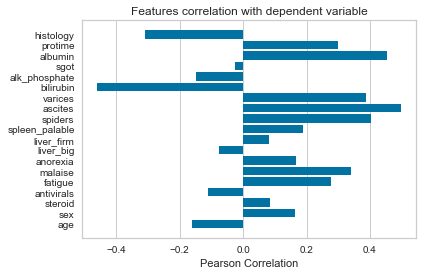

In [20]:
from yellowbrick.target import FeatureCorrelation


visualizer = FeatureCorrelation(labels=features)
visualizer.fit(X, y)
visualizer.poof()

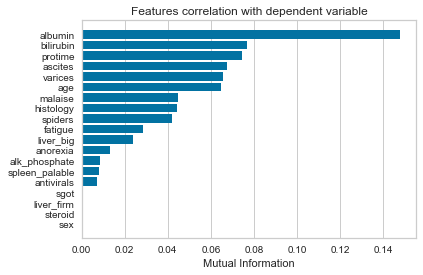

In [21]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(method='mutual_info-classification',
                                feature_names=features, sort=True)
visualizer.fit(X, y, random_state=0)
visualizer.poof()

Text(0,0.5,'Mean Error')

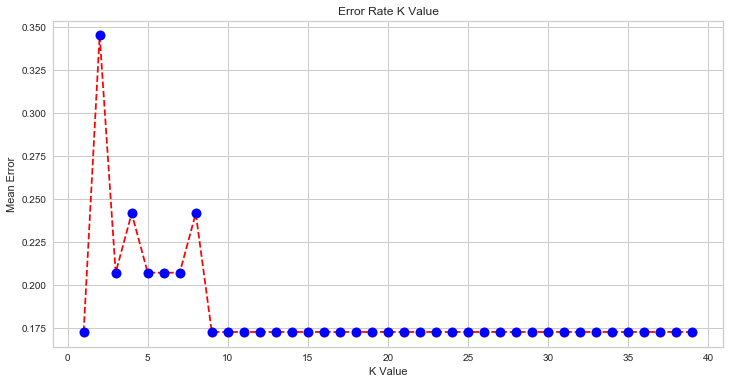

In [24]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = neighbors.KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') 

In [28]:
# Using GridSearchCV to find the optimal value of 'n_neighbors'
from sklearn.model_selection import GridSearchCV
#create new a knn model
knn2 =neighbors.KNeighborsClassifier()
#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}
#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
#fit model to data
knn_gscv.fit(X, y)



C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [29]:
#check top performing n_neighbors value
knn_gscv.best_params_

{'n_neighbors': 13}

In [30]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score_

0.8169014084507042

In [31]:
#spliting in train and test set
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify =y)  

In [32]:
#building the traiinign model
from sklearn.neighbors import KNeighborsClassifier
# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 13)
# Fit the classifier to the data
knn.fit(X_train,y_train)
# y_score = knn.decision_function(X_test)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=13, p=2,
           weights='uniform')

In [33]:
#show first 5 model predictions on the test data

y_pred = knn.predict(X_test)

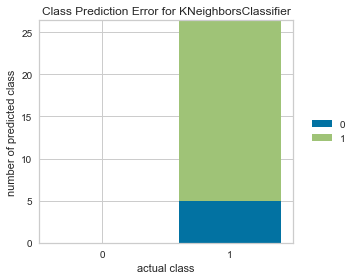

In [34]:
from yellowbrick.classifier import ClassPredictionError

# Instantiate the classification model and visualizer
visualizer = ClassPredictionError(knn, classes=[0,1])

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
g = visualizer.poof()

C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


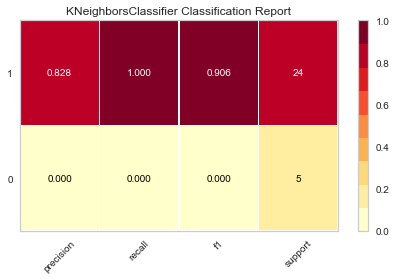

In [35]:
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(knn, classes=[0,1], support=True)

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

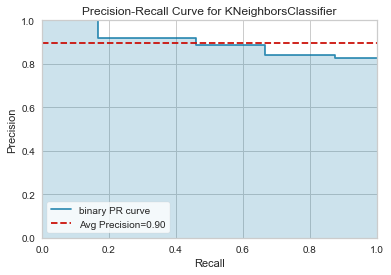

In [36]:
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
# Create the visualizer, fit, score, and poof it
viz = PrecisionRecallCurve(knn)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.poof()



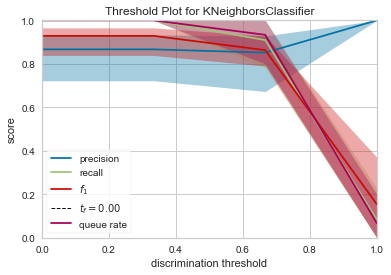

In [37]:
from yellowbrick.classifier import DiscriminationThreshold

# Instantiate the classification model and visualizer
visualizer = DiscriminationThreshold(knn)

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.poof()     # Draw/show/poof the data


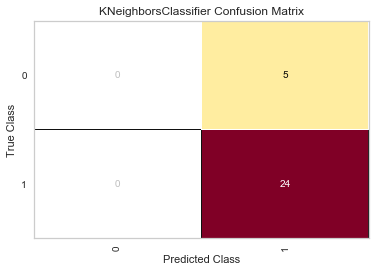

In [38]:
from yellowbrick.classifier import ConfusionMatrix
# The ConfusionMatrix visualizer taxes a model
cm = ConfusionMatrix(knn, classes=[0,1])

# Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

# To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
# and then creates the confusion_matrix from scikit-learn.
cm.score(X_test, y_test)

# How did we do?
cm.poof()

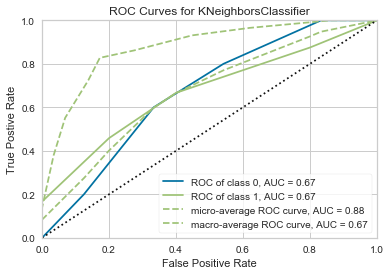

In [39]:
from yellowbrick.classifier import ROCAUC

# Instantiate the visualizer with the classification model
visualizer = ROCAUC(knn, classes=[0,1])

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [40]:
#check accuracy of our model on the test data
knn.score(X_test, y_test)
#Our model has an approx of 68%. NOw we see how to increase
# model performance below

0.8275862068965517

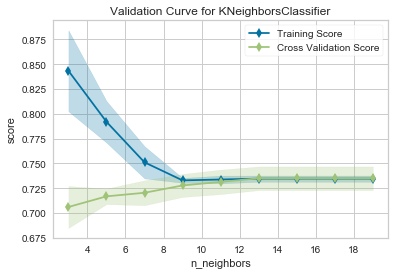

In [41]:
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import ValidationCurve
cv = StratifiedKFold(5)
param_range = np.arange(3, 20, 2)

oz = ValidationCurve(knn, param_name="n_neighbors",
    param_range=param_range, cv=cv, scoring="f1_weighted", n_jobs=4,
)

# Using the same game dataset as in the SVC example
oz.fit(X, y)
oz.poof()
# The k nearest neighbors (kNN) model is commonly used when similarity is important to the interpretation of the model. 
# Choosing k is difficult, the higher k is the more data is included in a classification, creating more complex decision topologies, 
# whereas the lower k is, the simpler the model is and the less it may generalize.
# Using a validation curve seems like an excellent strategy for choosing k, and often it is.
# However in the example above, all we can see is a decreasing variability in the cross-validated scores.

# This validation curve poses two possibilities: 
# first, that we do not have the correct param_range to find the best k and need to expand our search to larger values. 
# The second is that other hyperparameters (such as uniform or distance based weighting, or even the distance metric) may have more
# influence on the default model than k by itself does. Although validation curves can give us some intuition about the 
# performance of a model to a single hyperparameter, 
# grid search is required to understand the performance of a model with respect to multiple hyperparameters.

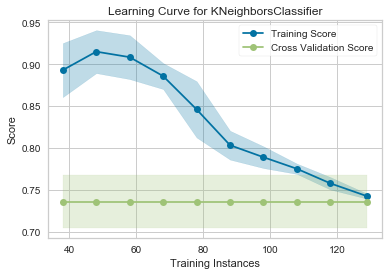

In [42]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import LearningCurve



# Specify the features of interest and the target
target = "class"
# Create the learning curve visualizer
cv = StratifiedKFold(12)
sizes = np.linspace(0.3, 1.0, 10)

viz = LearningCurve(knn, cv=cv, train_sizes=sizes,
    scoring='f1_weighted', n_jobs=4
)

# Fit and poof the visualizer
viz.fit(X, y)
viz.poof()


In [43]:
from sklearn.model_selection import cross_val_score
import numpy as np
#create a new KNN model
knn_cv = KNeighborsClassifier(n_neighbors=13)
#train model with cv of 5 
cv_scores = cross_val_score(knn_cv, X, y, cv=5)
#print each cv score (accuracy) and average them
print(cv_scores)
print("cv_scores mean:{}".format(np.mean(cv_scores)))

[0.8        0.82142857 0.82142857 0.82142857 0.82142857]
cv_scores mean:0.8171428571428571


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

{'n_neighbors': 10}

0.8309859154929577

Automatically created module for IPython interactive environment


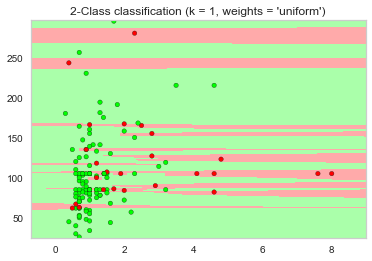

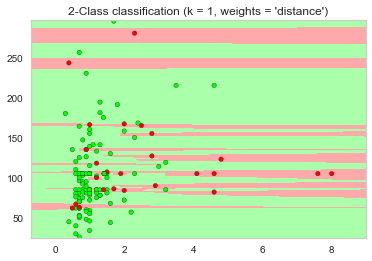

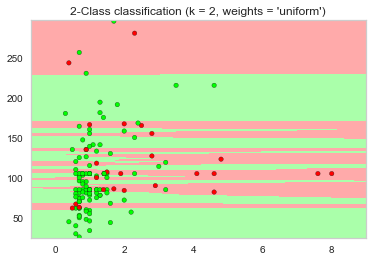

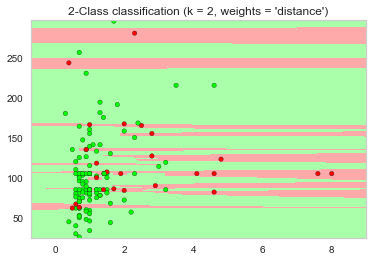

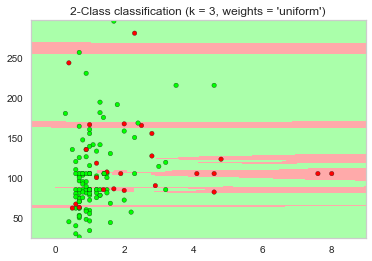

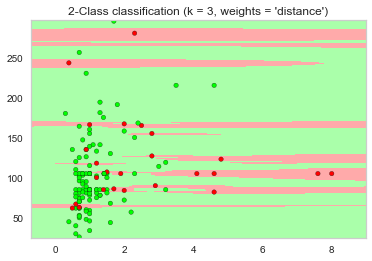

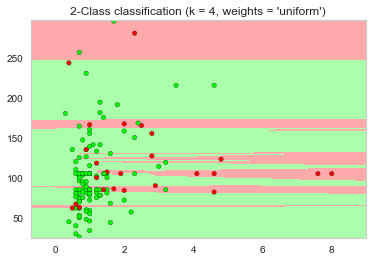

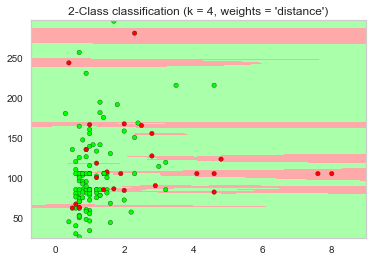

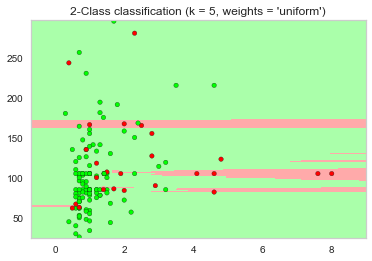

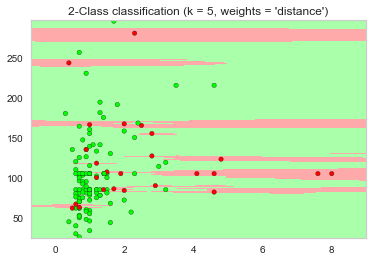

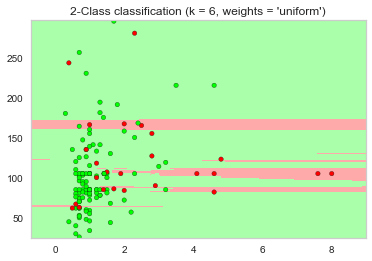

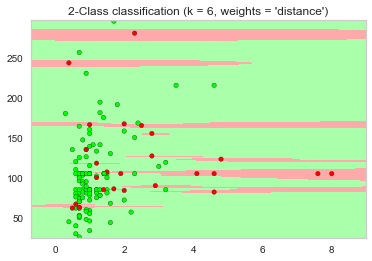

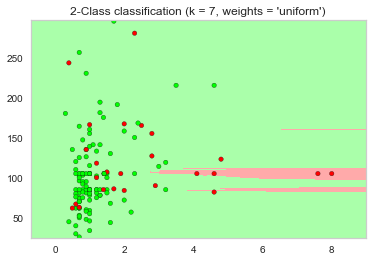

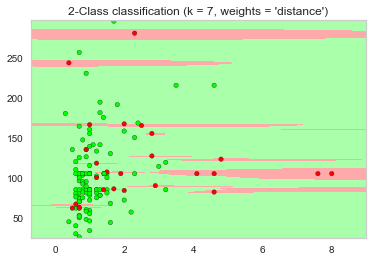

In [ ]:
print(__doc__)

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
X = hepData.drop('class', axis=1) 
y = hepData['class'] 
X =X.iloc[:,13:15]

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


for n_neighbors in range(1,40):


    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
        # Plot also the training points
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

    plt.show()

In [21]:
#Solving the problem of data imbalance by SMOTE
#over sample of minority class

length of training data
99
length of test data
43


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


length of oversampled data is  158
Number of hepatitis POS rows in oversampled data 79
No.of hepatitis HEG  79
Proportion of Hepatitis patients in oversampled data is  0.5
Proportion of non-Hepatitis patients in oversampled data is  0.5


C:\Users\SaniaZafar\PycharmProjects\MLWork\venv\lib\site-packages\sklearn\utils\validation.py:752: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Automatically created module for IPython interactive environment


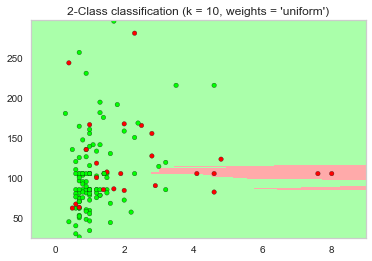

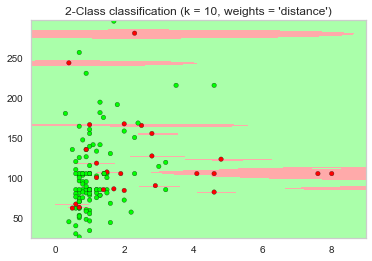

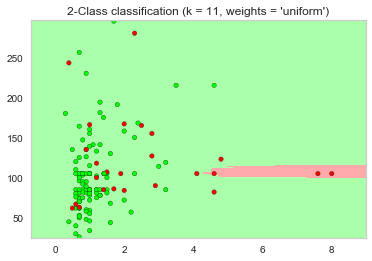

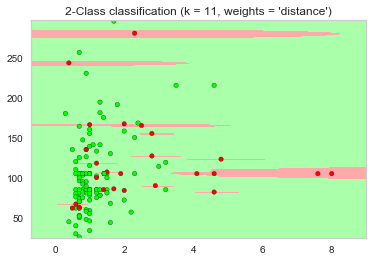

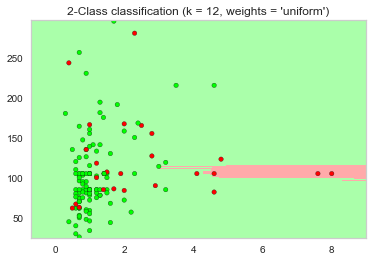

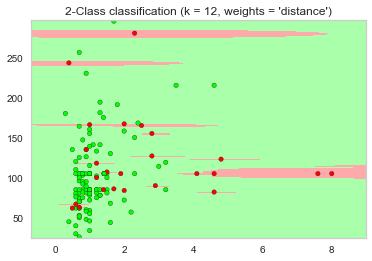

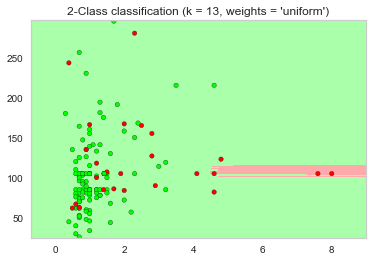

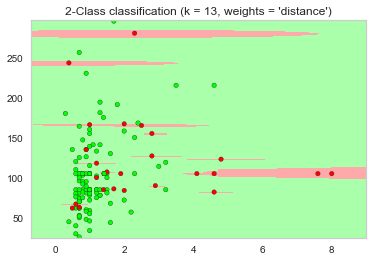

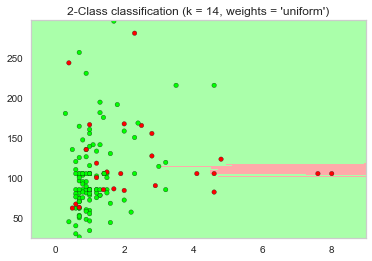

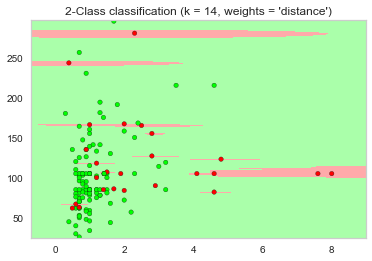

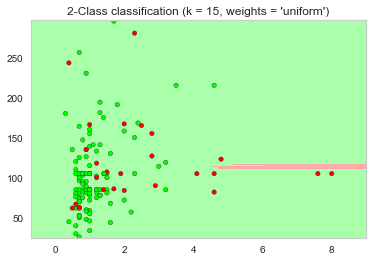

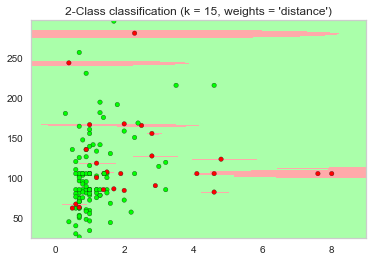

In [45]:
print(__doc__)

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset
# X = hepData.drop('class', axis=1) 
# y = hepData['class'] 
# X =X.iloc[:,13:15]
X = X.iloc[:,13:15]
y = y
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00'])


for n_neighbors in range(10,16):


    for weights in ['uniform', 'distance']:
        # we create an instance of Neighbours Classifier and fit the data.
        clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
        clf.fit(X, y)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        plt.figure()
        plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    
        # Plot also the training points
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
        plt.xlim(xx.min(), xx.max())
        plt.ylim(yy.min(), yy.max())
        plt.title("2-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

    plt.show()